### TAX DELINQUENCY DATA:

In [1]:
import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Constructing new table
tax = pd.read_csv("taxDelinquency.tsv", sep="\t")

tax['total_delq_tax'] = tax['current_delq_tax'] + tax['prior_delq_tax'].replace(0, pd.NA)

avg = tax.groupby('neighborhood')['total_delq_tax'].mean()
total = tax.groupby('neighborhood')['total_delq_tax'].sum()
Ttotal = pd.concat([avg, total], axis=1).reset_index()
Ttotal.columns = ['neighborhood', 'avg_delq_tax', 'total_delq_tax']

Tcount = tax.groupby(['neighborhood', 'state_description']).size().unstack(fill_value=0).reset_index()
Tcount['total_cases'] = Tcount.drop(columns='neighborhood').sum(axis=1)

taxdelq = pd.merge(Ttotal, Tcount, on='neighborhood')

cols = ['neighborhood', 'avg_delq_tax', 'total_delq_tax'] + \
       [col for col in taxdelq.columns if col not in ['neighborhood', 'avg_delq_tax', 'total_delq_tax', 'total_cases']] + \
       ['total_cases']
taxdelq = taxdelq[cols]

Tcount = tax.groupby(['neighborhood', 'state_description']).size().unstack(fill_value=0).reset_index()
Tcount['total_cases'] = Tcount.drop(columns='neighborhood').sum(axis=1) #Has total cases of tax delq for each neighborhood 

taxdelq = tax.groupby(['neighborhood', 'state_description']).size().unstack(fill_value=0).reset_index() #combines into one table
taxdelq = pd.merge(Ttotal, Tcount, on='neighborhood')
taxdelq['total_delq_tax'] = taxdelq['avg_delq_tax'] * taxdelq['total_cases']

state_cols = Tcount.columns.difference(['neighborhood', 'total_cases']).tolist()
taxdelq = taxdelq[['neighborhood', 'avg_delq_tax', 'total_delq_tax'] + state_cols + ['total_cases']]

print(taxdelq.head(10))

        neighborhood avg_delq_tax  total_delq_tax  Commercial  Gov't Owned  \
0   Allegheny Center     54756.98       109513.96           1            1   
1     Allegheny West      4667.05       116676.25          10            0   
2          Allentown  2234.148648       710459.27          14            0   
3          Arlington  2619.353671   623406.173671           6            2   
4  Arlington Heights      6184.11        18552.33           0            0   
5         Banksville   2913.75043    273892.54043          14            0   
6  Bedford Dwellings   2199.40661       129764.99           4            1   
7          Beechview  2930.779867  1547451.769734          27            0   
8        Beltzhoover  2477.964105      1509080.14          12            2   
9         Bloomfield  4210.201097      1305162.34          61            0   

   Industrial  Other  Residential  Utilities  total_cases  
0           0      0            0          0            2  
1           0      0 

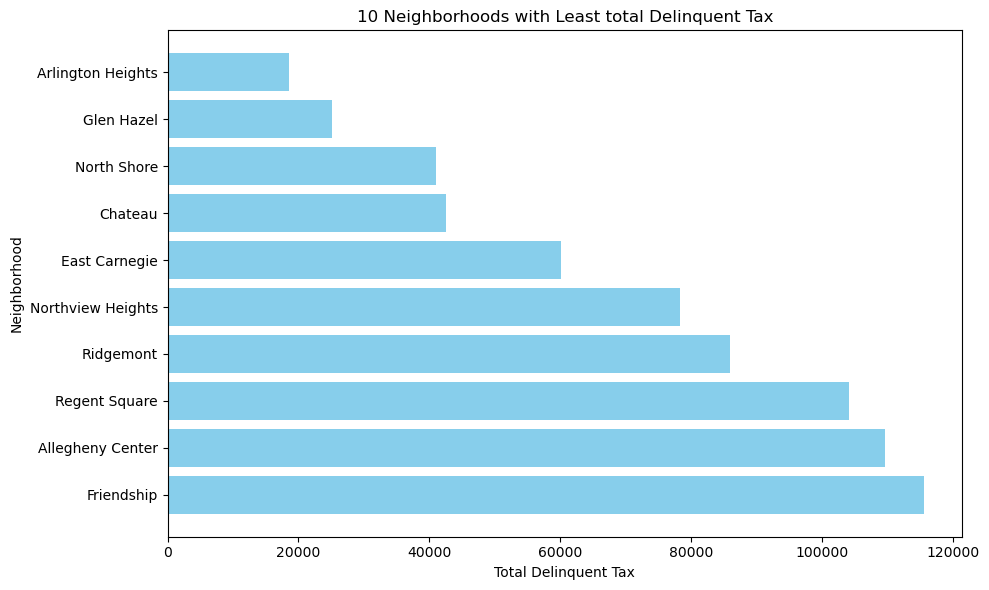

In [3]:
#Bar Graph Of total delq tax per neighborhood
bottomTotal = taxdelq.sort_values(by='total_delq_tax', ascending=True).head(10)
plt.figure(figsize=(10, 6))
plt.barh(bottomTotal['neighborhood'], bottomTotal['total_delq_tax'], color='skyblue')
plt.gca().invert_yaxis()  # So the smallest is at the top
plt.xlabel("Total Delinquent Tax")
plt.ylabel("Neighborhood")
plt.title("10 Neighborhoods with Least total Delinquent Tax")
plt.tight_layout()
plt.show()

In [4]:
most = taxdelq.sort_values(by='total_delq_tax', ascending=True).tail(1)
print(most)

           neighborhood  avg_delq_tax  total_delq_tax  Commercial  \
77  Squirrel Hill South  10484.645711  4445489.781422          22   

    Gov't Owned  Industrial  Other  Residential  Utilities  total_cases  
77            0           0      0          402          0          424  


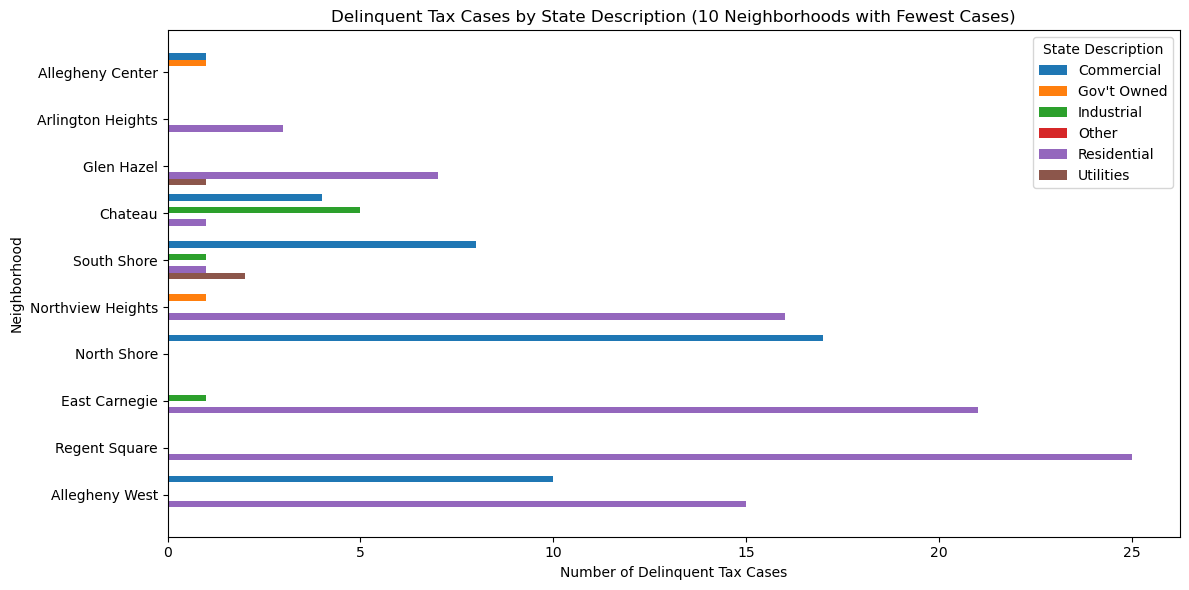

In [5]:
#Bar Graph of delq tax cases by neighborhood and description of tax. 
bottom10_cases = taxdelq.sort_values(by='total_cases', ascending=True).head(10)

neighborhoods = bottom10_cases['neighborhood'].tolist()
state_columns = [col for col in bottom10_cases.columns if col not in ['neighborhood', 'avg_delq_tax', 'total_delq_tax', 'total_cases']]

y = np.arange(len(neighborhoods))
bar_height = 0.8 / len(state_columns)
plt.figure(figsize=(12, 6))

for i, state in enumerate(state_columns):
    values = bottom10_cases[state].values
    plt.barh(y + i * bar_height, values, height=bar_height, label=state)

plt.yticks(y + bar_height * (len(state_columns) - 1) / 2, neighborhoods)
plt.xlabel("Number of Delinquent Tax Cases")
plt.ylabel("Neighborhood")
plt.title("Delinquent Tax Cases by State Description (10 Neighborhoods with Fewest Cases)")
plt.legend(title="State Description")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [6]:
avg_tax = taxdelq[taxdelq['neighborhood'] == 'Allegheny Center']['avg_delq_tax'].iloc[0]
print("Allegheny Center averages $" ,avg_tax, " per case")

avg_tax = taxdelq[taxdelq['neighborhood'] == 'Arlington Heights']['avg_delq_tax'].iloc[0]
print("Arlington Heights averages $" ,avg_tax, " per case")

Allegheny Center averages $ 54756.98  per case
Arlington Heights averages $ 6184.110000000001  per case


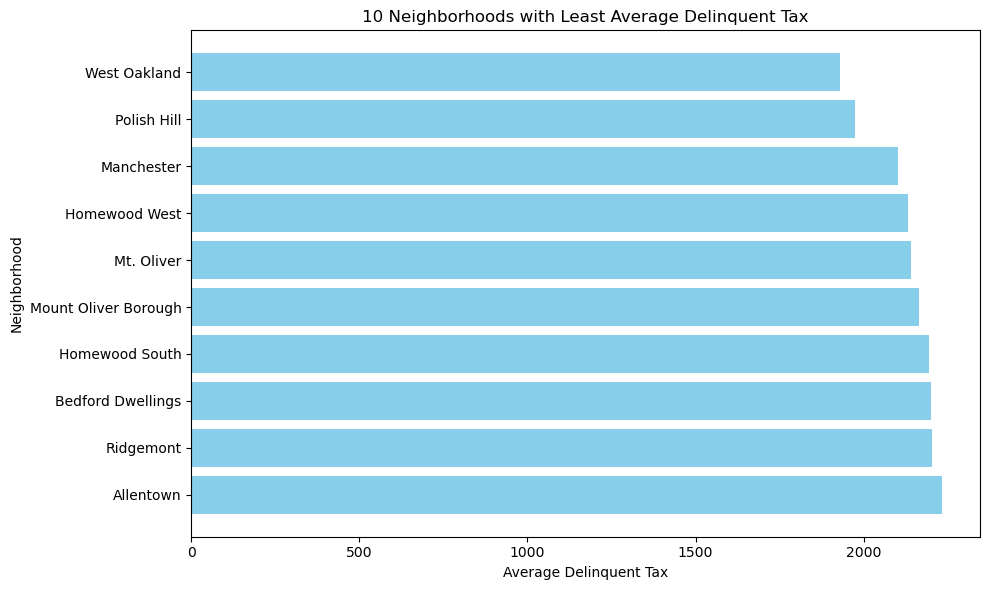

In [7]:
bottomAvg = taxdelq.sort_values(by='avg_delq_tax', ascending=True).head(10)
plt.figure(figsize=(10, 6))
plt.barh(bottomAvg['neighborhood'], bottomAvg['avg_delq_tax'], color='skyblue')
plt.gca().invert_yaxis()  # So the smallest is at the top
plt.xlabel("Average Delinquent Tax")
plt.ylabel("Neighborhood")
plt.title("10 Neighborhoods with Least Average Delinquent Tax")
plt.tight_layout()
plt.show()
